<a href="https://colab.research.google.com/github/doxxa11/KlasifikasiDaunGMB/blob/main/KlasifikasiDaun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Klasifikasi Daun menggunakan CNN oleh Ardio Pratama Putra 1101193327 TT-43-10*





---



---



**Melakukan import external Libraries**

In [1]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.core import Activation
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2

**Melakukan sinkronisasi drive google dengan google colab**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [4]:
ls DatasetDaun/

GMB_01/  GMB_02/  GMB_03/  GMB_04/  GMB_05/




---



---



**Mempersiapkan Dataset dengan mengarahkan jalur datanya**

In [5]:
jalurData = paths.list_files('DatasetDaun/')
data = []
labels = []

In [6]:
for jalurdata in jalurData:
  gambar = Image.open(jalurdata)
  gambar = np.array(gambar.resize((64,64))) / 255.0
  data.append(gambar)
  label = jalurdata.split(os.path.sep)[-2]
  labels.append(label)
print(labels)

['GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03', 'GMB_03',

**Mengubah label menjadi angka biner agar pengkomputasian lebih mudah**

In [7]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
print(labels)

[[0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 1 0]]


**Melakukan pembagian dataset training dan dataset testing**

In [8]:
trainX, testX, trainY, testY = train_test_split(np.array(data), np.array(labels), test_size=0.25)
print(trainX.shape)
print(testX.shape)

(438, 64, 64, 3)
(146, 64, 64, 3)


**Pembuatan Model Neural Network untuk mengolah dataset**

In [9]:
model = Sequential()
model.add(Convolution2D(16, (3,3), activation='relu', input_shape=(64,64,3),))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(438, activation='relu'))
model.add(Dense(438, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 438)               2747574   
_________________________________________________________________
dense_1 (Dense)              (None, 438)               1

**Melakukan Konfigurasi hyperparameter dan dataset training**

In [10]:
opt = Adam(lr=1e-3, decay=1e-3/50)
model.compile(
    loss="categorical_crossentropy", 
    optimizer=opt, 
    metrics=["accuracy"]
    )

training_Data = model.fit(trainX, trainY, 
                          validation_data=(testX,testY), 
                          batch_size=32,
                          epochs=25)

Epoch 1/25
14/14 [==============================] - 2s 139ms/step - loss: 1.7376 - accuracy: 0.2169 - val_loss: 1.6185 - val_accuracy: 0.2055
Epoch 2/25
14/14 [==============================] - 2s 127ms/step - loss: 1.5275 - accuracy: 0.3767 - val_loss: 1.4245 - val_accuracy: 0.4041
Epoch 3/25
14/14 [==============================] - 3s 211ms/step - loss: 1.2854 - accuracy: 0.4840 - val_loss: 1.2941 - val_accuracy: 0.4384
Epoch 4/25
14/14 [==============================] - 3s 249ms/step - loss: 1.0401 - accuracy: 0.6142 - val_loss: 1.0319 - val_accuracy: 0.5342
Epoch 5/25
14/14 [==============================] - 3s 200ms/step - loss: 0.8900 - accuracy: 0.6941 - val_loss: 1.0349 - val_accuracy: 0.5753
Epoch 6/25
14/14 [==============================] - 2s 117ms/step - loss: 0.8456 - accuracy: 0.6804 - val_loss: 0.9156 - val_accuracy: 0.6233
Epoch 7/25
14/14 [==============================] - 2s 118ms/step - loss: 0.6277 - accuracy: 0.7580 - val_loss: 0.9429 - val_accuracy: 0.5685
Epoch 

**Melakukan visualisasi data antara akurasi data dengan validasi keakuratan data, dan loss data dengan validasi loss data**

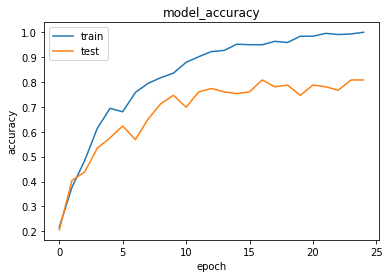

In [12]:
plt.plot(training_Data.history['accuracy'])
plt.plot(training_Data.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

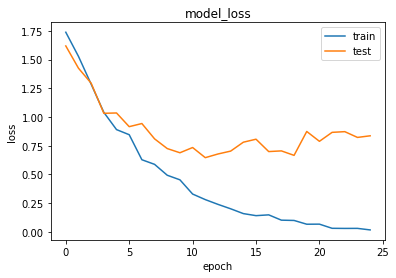

In [13]:
plt.plot(training_Data.history['loss'])
plt.plot(training_Data.history['val_loss'])
plt.title('model_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

**Prediksi dan evaluasi data**

In [14]:
prediksi = model.predict(testX, batch_size=32)
print(
    classification_report(
        testY.argmax(axis=1),
        prediksi.argmax(axis=1), 
        target_names=lb.classes_)
)

              precision    recall  f1-score   support

      GMB_01       0.72      0.75      0.74        28
      GMB_02       0.78      0.75      0.76        28
      GMB_03       0.95      0.86      0.90        21
      GMB_04       0.81      0.83      0.82        35
      GMB_05       0.83      0.85      0.84        34

    accuracy                           0.81       146
   macro avg       0.82      0.81      0.81       146
weighted avg       0.81      0.81      0.81       146



**Dapat dilihat bahwa nilai akurasi yang didapatkan 81%**



---



---




**Membaca data yang baru dan divisualisasikan untuk memastikan data yang ingin diprediksi**

In [25]:
ls

 DatasetDaun/           'Tugas Hari 1 Pekan 2 (1).ipynb'
'GMB 1.jpg'             'Tugas Hari 4 Pekan 2_Ardio Pratama Putra.ipynb'
 KlasifikasiDaun.ipynb


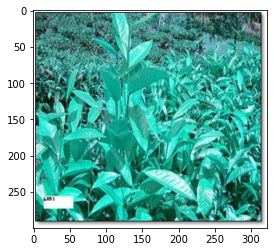

In [26]:
image_source = 'GMB 1.jpg'
image_array = cv2.imread(image_source)
plt.imshow(image_array)
plt.show()

**Membuka data testing dan me-*resize* data sesuai dengan kebutuhan**

In [27]:
image_test = Image.open('GMB 1.jpg')
image_test = np.array(image_test.resize((64,64)))/255.0
image_test.shape

(64, 64, 3)

**Menambahkan array didepan agar lebih mempermudah prediksi karena saat ditraining, data tersebut mengenal 4 dimensi yaitu jumlah gambar(1), ukuran gambar(64 dan 64), dan channel(3)**

In [28]:
image_test =np.expand_dims(image_test,axis=0)
print(image_test.shape)

(1, 64, 64, 3)


**Melakukan prediksi data mengunakan model neural network dengan data yang baru dengan output yang diinginkan adalah GMB 1**

In [29]:
hasilpred = model.predict(image_test, 1)
print(lb.classes_[hasilpred.argmax(axis=1)])

['GMB_01']


**Foto testing diprediksi sebagai GMB 1, yang artinya benar bahwa foto testing adalah foto daun GMB 1. Maka output yang dihasilkan benar**



---



---


